In [ ]:
'''
PART 1
'''

In [3]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import json

%matplotlib inline

In [3]:
logins = pd.read_json('logins.json')

In [4]:
logins = pd.Series(range(len(logins)), index = logins.login_time)

In [5]:
login_time = logins.resample('15min').count()

In [6]:
login_time

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
                      ..
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Freq: 15T, Length: 9788, dtype: int64

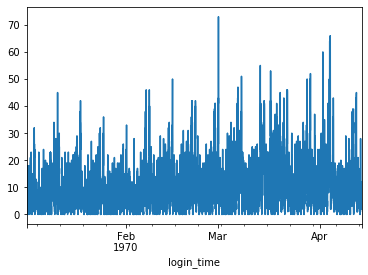

In [7]:
login_time.plot()
pyplot.show()

# visualizing the data by the 15-minute intervals doesn't give a clear picture of what the user patterns are

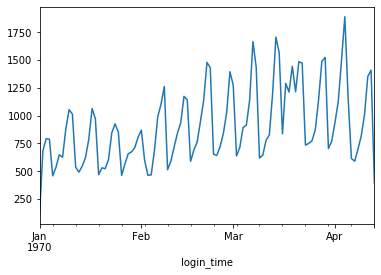

In [42]:
daily = login_time.resample('D').sum()
daily.plot()

# looking at the number of logins per day, regular fluctuations over each month become visible

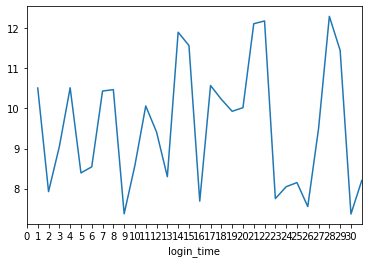

In [121]:
by_month = login_time.groupby(login_time.index.day).mean()
monthly_xaxis = np.arange(31)
by_month.plot(xticks = monthly_xaxis);

# it seems as though there is a drop off roughly every four days or so for the average month

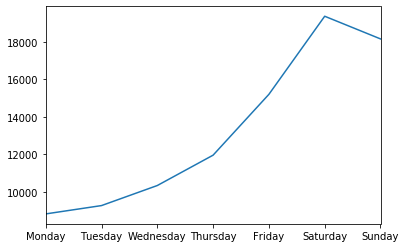

In [118]:
by_week = logins.index.day_name().value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekly_xaxis = np.arange(7)
by_week.plot(xticks = weekly_xaxis)

# the logins steadily rise through the average week and peak on Saturday
# the steep dropoff in logins occurs once the weekend ends

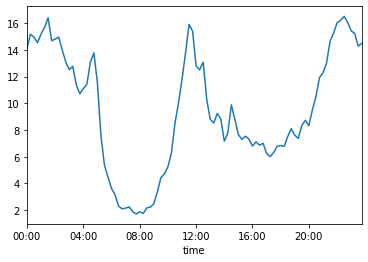

In [45]:
# now that the average weekly trend is clear, let's inspect intra-daily logins

by_day = login_time.groupby(login_time.index.time).mean()
daily_xaxis = 4 * 60 * 60 * np.arange(6)
by_day.plot(xticks = daily_xaxis);

# on average there is a steep drop-off in logins between 5:00am and 8:00am daily, and a smaller, more gradual dip 
# between noon and 5:00pm

In [ ]:
# in terms of data quality, the data only covers 3-and-a-half months, with the April data only going up to the 13rh
# more data needs to be collected to confirm these trends

In [ ]:
'''
PART 2
'''

In [ ]:
'''
1.
An increase in toll revenue would be the metric for success.
'''

In [ ]:
'''
2.
a. The experiment would include some split of a simple random sample of a test group of drivers and a control group
,ie, drivers who are not reimbursed for using the toll.
b. I would use a t-test of two independent samples to compare the significance of the mean toll revenue 
between the two groups (assuming the toll revenue follows a normal distribution) 
since the true variance of the population is already known
c. The null hypothesis states the means of the populations of the two groups are equal, i.e., the toll reimbursement 
has no no effect on toll revenue. We reject the null hypothesis if the t-statistic is greater than 
the critical value, derived from a chosen alpha level (e.g., 0.05)

If the null hypothesis is rejected, we can implement the experiment on a larger scale. If the null hypothesis holds,
other incentives might need to be considered. Perhaps removing the toll altogether would have an effect even if 
reimbursement didn't.
'''

In [ ]:
'''
PART 3
'''

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
import json
from datetime import datetime, timedelta

In [4]:
'''
1.
'''


In [5]:
with open(r"ultimate_data_challenge.json", "r") as f:
    data = json.load(f)


In [935]:
ultimate = pd.DataFrame(data)

In [864]:
sorted(ultimate.last_trip_date, reverse = True)[:10]

['2014-07-01',
 '2014-07-01',
 '2014-07-01',
 '2014-07-01',
 '2014-07-01',
 '2014-07-01',
 '2014-07-01',
 '2014-07-01',
 '2014-07-01',
 '2014-07-01']

In [865]:
d = datetime.strptime('2014-07-01', '%Y-%m-%d') - timedelta(days=30)

In [866]:
d

# users who have taken a trip since June 1st are considered active for this data set

datetime.datetime(2014, 6, 1, 0, 0)

In [936]:
ultimate.isna().sum()

# ~8000 entries are missing
# we will drop these

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [937]:
ultimate.dropna(inplace = True)

In [938]:
ultimate.reset_index(drop = True, inplace = True)

In [939]:
y = ultimate.last_trip_date

In [940]:
X = ultimate.loc[:, ultimate.columns != 'last_trip_date']

In [941]:
y = y.map(lambda x: 1 if datetime.strptime(x, '%Y-%m-%d') > datetime(2014, 6, 1, 0, 0) else 0).values

In [942]:
X.loc[:,'city'] = X['city'].map(dict(zip(["King's Landing", 'Astapor', 'Winterfell'],[0,1,2])))

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [943]:
X.loc[:, 'phone'] = X['phone'].map(dict(zip(['iPhone', 'Android'], [0,1])))

In [944]:
X.loc[:,'signup_date'] = X['signup_date'].map(pd.to_datetime) 
X.loc[:, 'signup_date'] = X['signup_date'].map(datetime.toordinal)

In [945]:
X = X.values

In [946]:
y.sum()

# 16608 active users of those who singed-up in January 2014

16608

In [947]:
y.sum()/len(y)

# about 40% of the observed users were retained

0.40072385088671736

In [909]:
model = ExtraTreesClassifier(n_estimators = 100, random_state = 0)

In [910]:
model.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [911]:
model.feature_importances_

array([0.07693024, 0.09100236, 0.12422156, 0.07925698, 0.05231148,
       0.04904896, 0.0693233 , 0.04116325, 0.14417665, 0.17448904,
       0.09807618])

In [912]:
pd.DataFrame(model.feature_importances_,
             index = np.delete(ultimate.columns.values, np.argwhere(ultimate.columns.values == 'last_trip_date')),
            columns = ['Feature Importances']).sort_values(by = 'Feature Importances', ascending = False)

,Feature Importances
avg_dist,0.174489
weekday_pct,0.144177
signup_date,0.124222
avg_rating_by_driver,0.098076
trips_in_first_30_days,0.091002
avg_rating_of_driver,0.079257
city,0.076930
surge_pct,0.069323
avg_surge,0.052311
phone,0.049049


In [ ]:
# Average distance in miles per trip within the first 30 days after signup is the biggest predictor of retention, 
# followed by the percentage of the user's trips occurring during a weekday
# Signup date is third, followed by the average rating by drive and the number of trips in the first 30 days

In [ ]:
'''
2.
'''

In [835]:
from sklearn.ensemble import RandomForestClassifier

In [838]:
from sklearn.model_selection import train_test_split

In [ ]:
from dateutil.relativedelta import relativedelta

In [949]:
six_months_out = []

for i in range(len(ultimate.signup_date)):
    six_months_out.append(datetime.strptime(ultimate.signup_date[i], '%Y-%m-%d') 
                                             + relativedelta(months=+6) - timedelta(days=30))

In [950]:
y2 = ultimate.last_trip_date.copy()

In [952]:
for i in range(len(y2)):
    if datetime.strptime(y2[i], '%Y-%m-%d') > six_months_out[i]:
        y2.iloc[i] = 1
    else:
        y2.iloc[i] = 0

In [954]:
X_train, X_test, y_train, y_test = train_test_split(X, y2)

In [955]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [956]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [957]:
clf.score(X_test, y_test)

0.803030303030303

In [ ]:
# I chose a random forest classifier because it usually has the highest performance behind
# gradient boosting. The drawback is that it's computationally expensive compared to other
# traditional classification methods such as logistic regression. However, my dataset is small,
# so this wasn't an issue.
# The model receives an accuracy score of about .80, which is pretty good. 

In [ ]:
'''
3.
'''

In [ ]:
# Since weekday percentage is one of the top indicators of retention, special weekday offers 
# can be made to customers who are in danger of churning in six months
# Ultimate could also use a similar offer to increase the number of rides the user takes in the
# first 30 days.